## Insider Buying Scraper

In [35]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
#mysql portion

#base_url = 'http://www.finviz.com/insidertrading.ashx?or=-10&tv=100000&tc=1&o=-transactionValue'
base_url = 'http://www.finviz.com/insidertrading.ashx?tc=1'
html = requests.get(base_url)
soup = BeautifulSoup(html.content, "html.parser")
table = soup.find('table', attrs={'class': 'body-table'})
rows = table.findAll('tr', attrs={'class': 'insider-buy-row-2'})
tick =[]
own = []
rel = []
dt = []
trans = []
c = []
sh = []
val = []
sh_t = []
sec = []
df = pd.DataFrame()
#if len(soup.findAll('tr')) > 0:
#    rows = rows[1:]

for row in rows:
        cells = row.findAll('td')
        ticker = cells[0].get_text()
        tick.append(ticker)
df['ticker'] = tick  
for row in rows:
        cells = row.findAll('td')
        owner = cells[1].get_text()
        own.append(owner)
df['owner'] = own
for row in rows:
    cells = row.findAll('td')
    relationship = cells[2].get_text()
    rel.append(relationship)
df['relationship'] = rel
for row in rows:
        cells = row.findAll('td')
        date = cells[3].get_text( )
        dt.append(date)
df['date'] = dt
for row in rows:
        cells = row.findAll('td')
        transaction = cells[4].get_text()
        trans.append(transaction)
df['transaction'] = trans
for row in rows:
        cells = row.findAll('td')
        cost = cells[5].get_text()
        c.append(float(cost))
df['cost'] = c
for row in rows:
        cells = row.findAll('td')        
        shares = cells[6].get_text()
        sh.append(shares)
df['shares'] = sh
for row in rows:
        cells = row.findAll('td')        
        value = cells[7].get_text()
        val.append(value)
df['value'] = val
for row in rows:
        cells = row.findAll('td')        
        shares_total = cells[8].get_text()
        sh_t.append(shares_total)
df['shares_total'] = sh_t
for row in rows:
        cells = row.findAll('td')
        sec_form4 = cells[9].get_text()
        sec.append(sec_form4)
df['sec_form4'] = sec


### Print of first 5 rows

In [39]:
df.head()

,ticker,owner,relationship,date,transaction,cost,shares,value,shares_total,sec_form4
0,OPK,FROST PHILLIP MD ET AL,CEO & Chairman,Feb 02,Buy,4.30,"55,000","236,680","945,000",Feb 05 07:09 AM
1,BANC,Bogler John A.,CHIEF FINANCIAL OFFICER,Feb 01,Buy,19.30,"20,000","386,000","37,500",Feb 05 06:00 AM
2,KALA,ORBIMED ADVISORS LLC,10% Owner,Jan 31,Buy,15.00,"339,400","5,091,000","3,362,160",Feb 02 05:45 PM
3,FLDM,"LEVIN CAPITAL STRATEGIES, L.P.",Passive Investor,Jan 31,Buy,6.18,"145,025","896,575","10,590,907",Feb 02 05:32 PM
4,MAA,SANDERS WILLIAM REID,Director,Feb 02,Buy,91.33,"2,100","191,785","6,000",Feb 02 04:45 PM


### Dataframe with closer look at relationship of insider to company (by ticker)
The below dataframe makes it easier to see the likelihood of the exercising of stocks options, as opposed to more suspicious insider buying based on insider information. Next step would be to plot the price of the given ticker and overlay the point of the insider buying.

In [55]:
df.groupby(['ticker','owner','relationship', 'date']).mean()

cost
ticker owner                          relationship            date          
BANC   Bogler John A.                 CHIEF FINANCIAL OFFICER Feb 01   19.30
BETR   HERSHEY CO                     10% Owner               Jan 31   12.00
BH     BIGLARI, SARDAR                Director                Feb 01  414.64
                                                              Jan 25  414.00
                                                              Jan 26  418.93
                                                              Jan 29  417.31
                                                              Jan 30  415.89
                                                              Jan 31  416.43
BPFH   MacDonald W. Timothy           EVP, Chief Risk Officer Jan 25   15.32
CPAH   MATTHEWS TERENCE H             Chairman                Jan 24    4.01
CRSP   BAYER AKTIENGESELLSCHAFT       10% Owner               Jan 05   22.75
DNP    Hoffman Clifford W. Jr.        Director                Feb 01   10.33
FLDM   LEVIN CAPITAL STRATEGIES, L.P. Passive Investor        Jan 31    6.18
GSBC   Pitt Douglas M                 Director                Jan 29   51.58
JUNO   FLATLEY JAY T                  Director                May 30   22.92
KALA   ORBIMED ADVISORS LLC           10% Owner               Jan 31   15.00
LPG    BW Group Ltd                   10% Owner               Jan 26    7.30
                                                              Jan 29    7.53
MAA    SANDERS WILLIAM REID           Director                Feb 02   90.97
MATW   Marsh Robert M                 VP and Treasurer        Jan 30   55.50
OPK    FROST PHILLIP MD ET AL         CEO & Chairman          Feb 02    4.30
                                                              Jan 26    4.90
                                                              Jan 31    4.47
RRC    PALKO STEFFEN E                Director                Jan 30   14.72
RVLT   DePalma James                  Chief Financial Officer Jan 29    3.60
       LAPENTA ROBERT V               Chairman and CEO        Jan 29    3.60
SFNC   MAKRIS GEORGE JR               Chairman & CEO          Jan 25   58.10
SLG    HOLLIDAY MARC                  Chief Executive Officer Jan 29   25.20
TCPC   LEVKOWITZ HOWARD               CEO                     Jan 30   15.28
VSI    SHAH CAPITAL MANAGEMENT        10% Owner               Feb 02    4.07

### Graph of Most Actively Bought Insider Traded Symbols

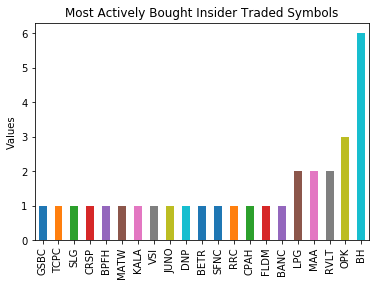

In [47]:
df.ticker.value_counts().sort_values().plot(kind = "bar")
plt.ylabel('Values');
plt.title('Most Actively Bought Insider Traded Symbols');

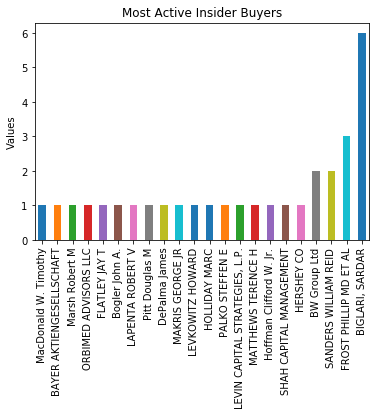

In [49]:
df.owner.value_counts().sort_values().plot(kind = "bar")
plt.ylabel('Values');
plt.title('Most Active Insider Buyers');